In [102]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
import matplotlib as mpl


**Load MNIST Data**

In [103]:
# Load the MNIST dataset from Sklearn datasets
# The MNIST dataset is a collection of handwritten digits, commonly used for training various image processing systems.
mnist = fetch_openml('mnist_784', version= 1, cache = True, as_frame= False)
print(mnist.DESCR)


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [104]:
# The dataset consists of 70,000 images of handwritten digits (0-9), each image is 28x28 pixels.
# Each image is represented as a 784-dimensional vector (28*28 = 784).
# The target variable is the digit represented by the image (0-9).
# The dataset is split into features (X) and target (y).
X = mnist['data']
y = mnist['target'].astype(np.uint8)


**Exploratory Data Analysis**

In [105]:
#Inspect data 

print(X.shape) # 70,000 samples, 784 features (28x28 pixels)
print(y.shape) # 70,000 samples, 1 target variable (digit 0-9)

# Display the first 5 samples of the dataset
print(X[0]) 
print(y[0]) 

(70000, 784)
(70000,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

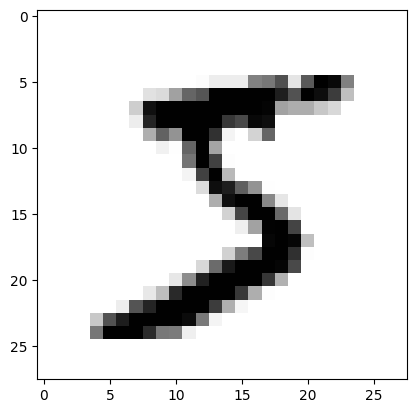

In [106]:
# Plotting the features of the X data, it looks like a 5. 
some_digit = X[0] 
some_digit_image = some_digit.reshape(28, 28) 
plt.imshow(some_digit_image, cmap=mpl.cm.binary) 
print(some_digit_image) 

**Test - Train - Split**

In [107]:
# We are spliting whole 70000 data into 3 parts:
# 1. Training set: 50,000 samples
# 2. Validation set: 10,000 samples
# 3. Test set: 10,000 samples.

x_train = X[ :50000]
y_train = y[ :50000]
x_val = X[50000:60000]
y_val = y[50000:60000]
x_test = X[60000:70000]
y_test = y[60000:70000]

In [108]:
#Normalizing data 
#to scale the pixel values to a range of 0 to 1.

x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

**SUPPORT VECTOR MACHINE - MODEL 1**

In [109]:
# fit using Support Vector Machine (SVM) classifier
# The SVM classifier is a supervised machine learning algorithm that can be used for classification tasks.
#we are using grid search to find the best hyperparameters for the SVM classifier.
# The hyperparameters being tuned are 'C' (regularization parameter) and 'gamma' (kernel coefficient).


parameter_grid = {'C':[10,100],
               'gamma' : [0.001,0.01,0.1,'scale']}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
Svm_hyp = GridSearchCV(SVC(kernel='rbf', 
                           random_state=42), 
                           parameter_grid,  
                           cv=cv, 
                           scoring='accuracy', 
                           n_jobs=-1)
Svm_hyp = Svm_hyp.fit(x_train,y_train)

In [110]:
Svm_hyp.best_params_

{'C': 100, 'gamma': 'scale'}

**Evaluate SVM model using validation data**

In [111]:

#SVM Model accuracy score using Grid Search

y_val_pred = Svm_hyp.predict(x_val)
print(accuracy_score(y_val,y_val_pred))

0.9842


**Save model using JOBLIB**

In [112]:
# Import joblib and dump the model into it

joblib.dump(Svm_hyp,'svm_model.pk1')


['svm_model.pk1']

**RANDOM FOREST MODEL - MODEL 2**

In [113]:

random_forest =  RandomForestClassifier(n_jobs=-1, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

**Evaluate model with validation data**

In [114]:
y_val_pred1 = random_forest.predict(x_val)
print(accuracy_score(y_val,y_val_pred1))

0.9734


**Save model**

In [115]:
joblib.dump(random_forest,'rf_model.pk1')

['rf_model.pk1']

**Load models**

In [116]:
# load saved models
svm_model = joblib.load('svm_model.pk1')
rf_model = joblib.load('rf_model.pk1')

**Evaluating 2 models with test data**

In [117]:
# SVM model
y_pred_test = svm_model.predict(x_test)
y_pred_test


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

SVM model accuracy with test data :0.9836


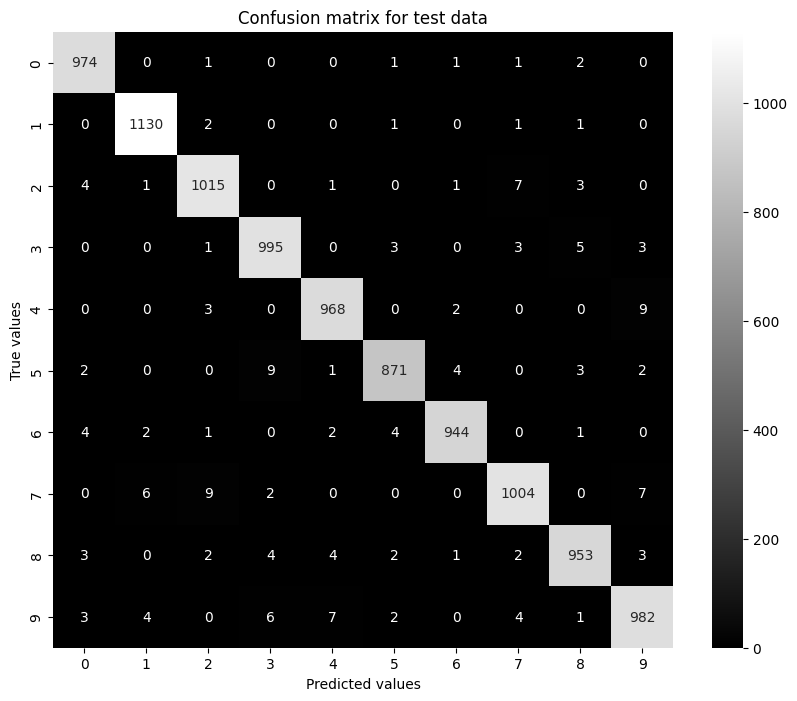

In [118]:
#Test accuracy for SVM model
test_accuracy = accuracy_score(y_test,y_pred_test)
print(f"SVM model accuracy with test data :{test_accuracy:.4f}")

# Confusion matrix for SVM model

confusion_mat = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize =(10,8))
sns.heatmap(confusion_mat,annot=True,cmap='gray',fmt='d')

plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix for test data')
plt.show()

In [119]:
#Random Forest model
y_pred_test1 = rf_model.predict(x_test)
y_pred_test1

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

Random Forest model accuracy with test data :0.9680


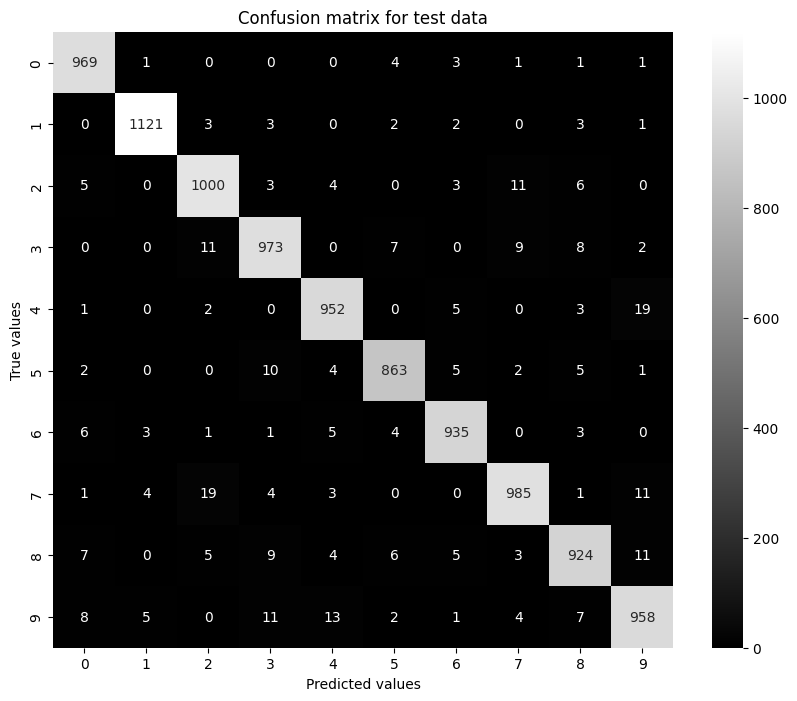

In [120]:
#test accuracy for Random Forest model
test_accuracy1 = accuracy_score(y_test,y_pred_test1)
print(f"Random Forest model accuracy with test data :{test_accuracy1:.4f}")
# Confusion matrix for Random Forest model
confusion_mat1 = confusion_matrix(y_test,y_pred_test1)
plt.figure(figsize =(10,8))
sns.heatmap(confusion_mat1,annot=True,cmap='gray',fmt='d')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Confusion matrix for test data')
plt.show()
